In [23]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


import libraries 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import string




In [25]:
data = pd.read_csv("/workspaces/codespaces-jupyter/data/Reviews.csv")

data understanding

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69998 entries, 0 to 69997
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Score         69998 non-null  int64 
 1   Text          69998 non-null  object
 2   Text_cleaned  69998 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [28]:
data.shape

(69998, 3)

In [29]:
data

,Score,Text,Text_cleaned
0,5,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,4,This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...,great taffy at a great price. there was a wid...
...,...,...,...
69993,5,Lambert Kay makes the best dog shampoo and con...,lambert kay makes the best dog shampoo and con...
69994,5,I have searched for a conditioner for my Yorks...,i have searched for a conditioner for my yorks...
69995,5,I've been using this for years. While I have ...,i've been using this for years. while i have ...
69996,5,This is the best rinse for dogs that we have e...,this is the best rinse for dogs that we have e...


EDA 

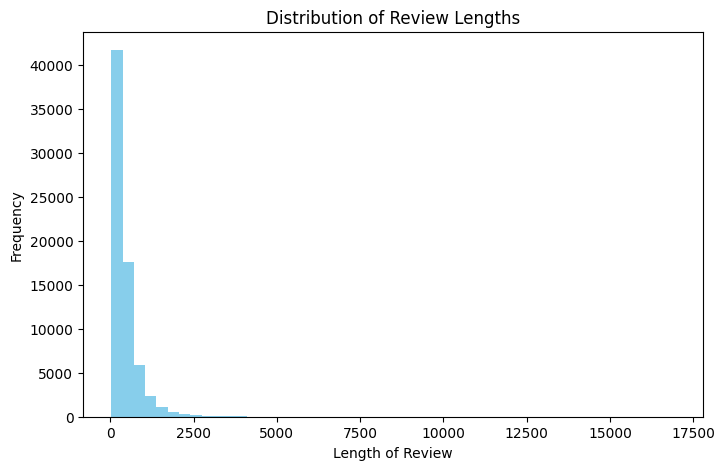

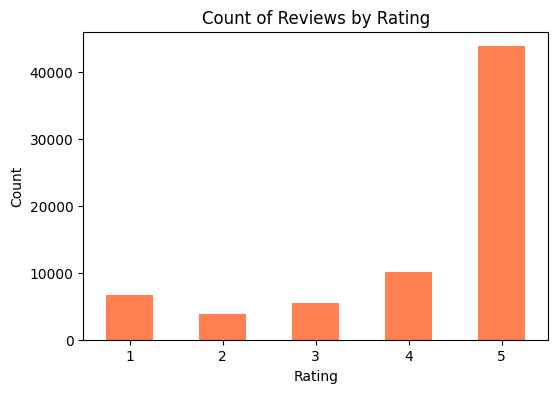

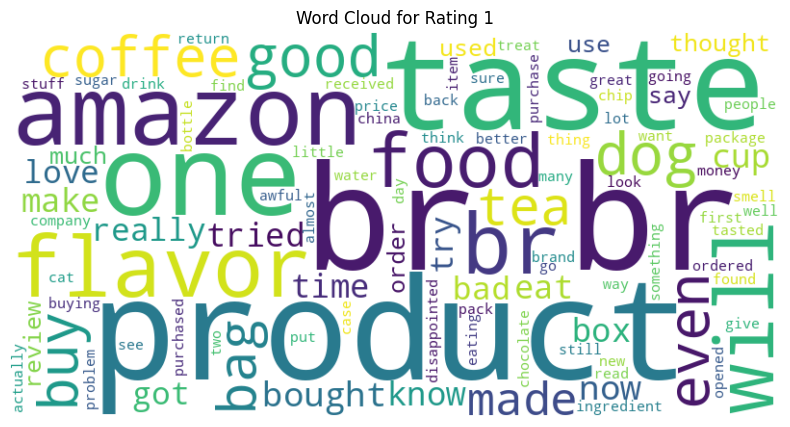

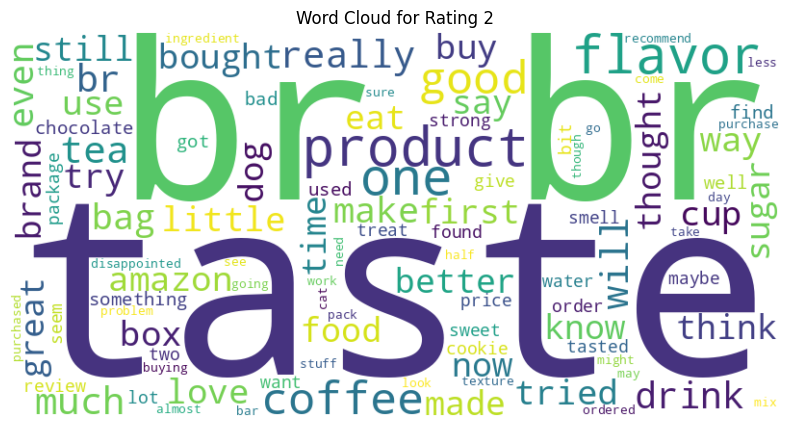

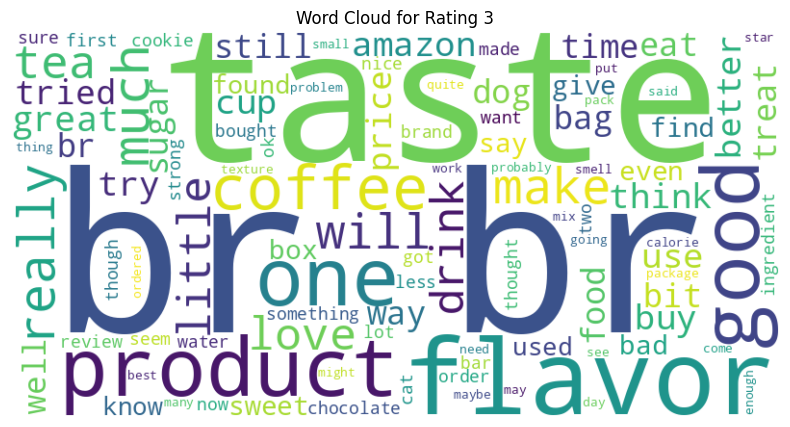

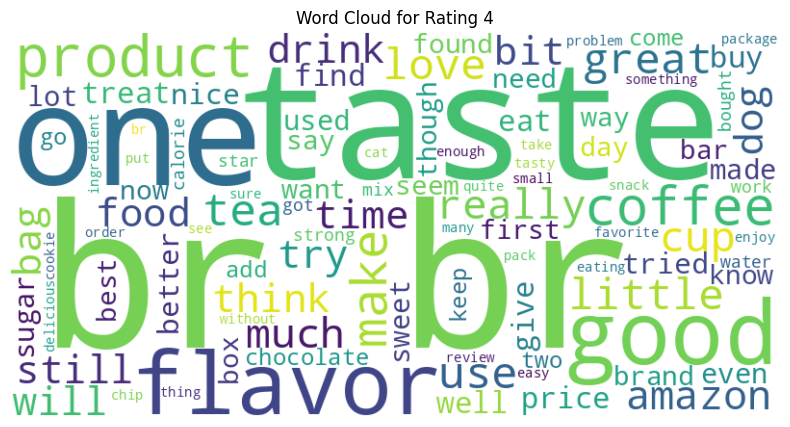

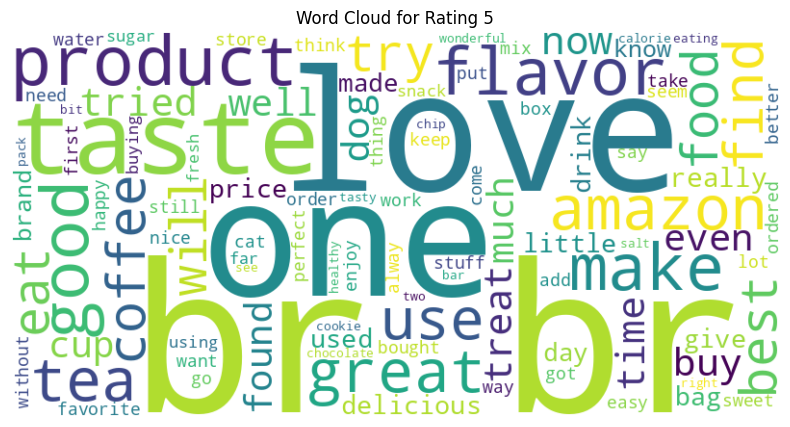

In [30]:
# calculate the length of each review
data['text_length'] = data['Text_cleaned'].apply(len)

#  Distribution of review lengths
plt.figure(figsize=(8, 5))
plt.hist(data['text_length'], bins=50, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

#  Count of reviews for each rating
rating_counts = data['Score'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
rating_counts.plot(kind='bar', color='coral')
plt.title('Count of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#  Word clouds for each rating
for score in range(1, 6):
    reviews = data[data['Score'] == score]['Text_cleaned']
    all_words = ' '.join(reviews)
    
    if len(all_words) > 0:  # Ensure there are words to generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Rating {score}')
        plt.show()


preprocessing data

In [26]:
data['Text_cleaned'] = data['Text'].str.lower()

In [31]:
# filter neutral reviews rating = 3 and assign sentiments
data = data[data['Score'] != 3]
data['Sentiment'] = data['Score'].apply(lambda x: 1 if x >= 4 else 0)

/tmp/ipykernel_1920/2584381221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Score'].apply(lambda x: 1 if x >= 4 else 0)


In [32]:
import nltk
import spacy
from nltk.corpus import stopwords


nlp = spacy.load('en_core_web_sm')


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function for advanced preprocessing with lemmatization and stop word removal
def advanced_preprocess_text(text):
    text = text.lower()  
    text = re.sub('https?://\S+|www\.\S+', '', text) 
    text = re.sub(r"\b\d+\b", "", text)  
    text = re.sub('<.*?>+', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub('\n', '', text)  
    text = re.sub('[’“”…]', '', text) 
    emoji_pattern = re.compile("["                              
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)  # removing emojis

    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)

    # Lemmatization and Stop Words removal
    doc = nlp(text)
    cleaned_text = " ".join([token.lemma_ for token in doc if token.text.lower() not in stop_words and not token.is_punct])

    return cleaned_text

data['Text_cleaned_advanced'] = data['Text_cleaned'].apply(advanced_preprocess_text)

data[['Text', 'Text_cleaned_advanced']].head()


<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_1920/786755199.py:15: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)  # removing URL links
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/tmp/ipykernel_1920/786755199.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text_cleaned_advanced'] = data['Text_cleaned'].apply(advanced_preprocess_text)


,Text,Text_cleaned_advanced
0,I have bought several of the Vitality canned d...,buy several vitality can dog food product find...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived label jumbo salt peanutsthe pe...
2,This is a confection that has been around a fe...,confection around century light pillowy citr...
3,If you are looking for the secret ingredient i...,look secret ingredient robitussin believe find...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yumm...


Tokenization 

In [35]:
# Tokenization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  
X = tfidf_vectorizer.fit_transform(data['Text_cleaned_advanced']) 
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


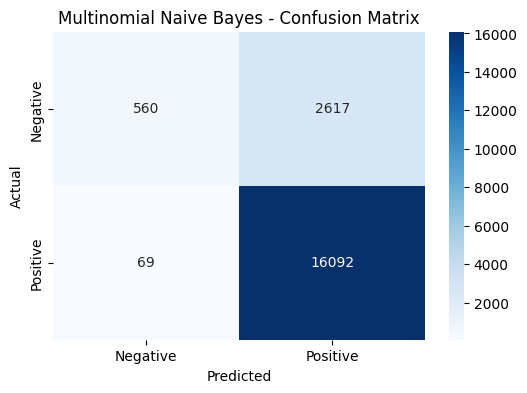

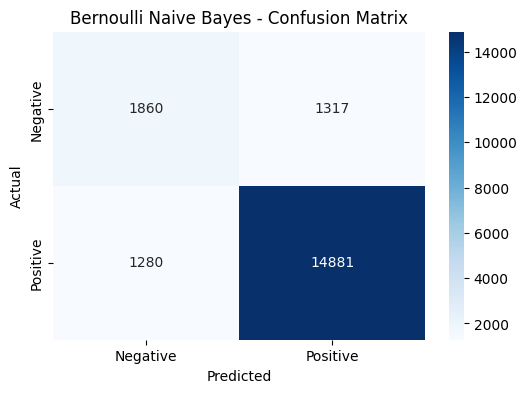

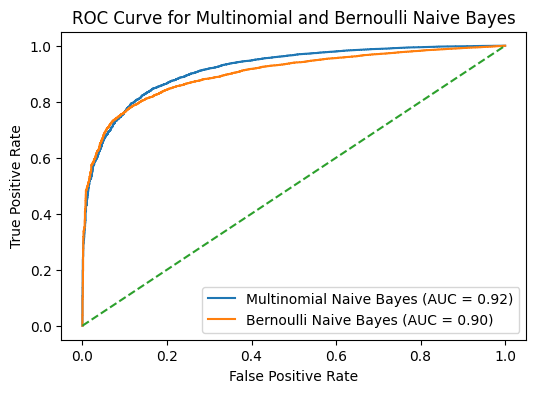

,Accuracy,Precision,Recall,ROC AUC
Multinomial Naive Bayes,0.861102,0.860121,0.995730,0.918080
Bernoulli Naive Bayes,0.865705,0.918694,0.920797,0.900966


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Function to evaluate and store model results
def evaluate_model(model, model_name, results_dict):
    # Train the model
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results_dict[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc
    }
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return y_pred_proba

results = {}

mnb = MultinomialNB()
mnb_proba = evaluate_model(mnb, "Multinomial Naive Bayes", results)

bnb = BernoulliNB()
bnb_proba = evaluate_model(bnb, "Bernoulli Naive Bayes", results)

plt.figure(figsize=(6, 4))

fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb_proba)
plt.plot(fpr_mnb, tpr_mnb, label='Multinomial Naive Bayes (AUC = {:.2f})'.format(results['Multinomial Naive Bayes']['ROC AUC']))

fpr_bnb, tpr_bnb, _ = roc_curve(y_test, bnb_proba)
plt.plot(fpr_bnb, tpr_bnb, label='Bernoulli Naive Bayes (AUC = {:.2f})'.format(results['Bernoulli Naive Bayes']['ROC AUC']))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial and Bernoulli Naive Bayes')
plt.legend()
plt.show()

evaluation_df = pd.DataFrame(results).T
evaluation_df
